In [1]:
## Important Options:
run_epochs = 200
run_model_type = "semi_y_CCVAE"

run_save_folder = "../../outputs/experiments_test/syntheticshapes/ccvae/" 
run_read_data_folder = "../../data/examples_synthetic_shapes/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;


In [2]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --use-binary-img \
    --y-clean-prior 0.6 \
    --q-y-x-coeff 50000.0 \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_synthetic_shapes/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=False, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.5, kl_anneal_start=1e-06, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_CCVAE', number_epochs=200, output_folder='../../outputs/experiments_test/syntheticshapes/ccvae/', q_y_x_coeff=50000.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=784, size_output=784, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='10_samples_per_class', use_

### Define Paths

In [3]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [4]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [5]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [6]:
ls "../../data/examples_synthetic_shapes/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_class.csv
trusted_idxs_10_samples_per_class.csv  y_noise_dict.json


### Check VARS on Notebook

In [7]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7f316c25d790>
dict_main_vars         dict             n=51
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7f302438b3a0>
file_path_data         str              ../../data/examples_synth<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>hapes/ccvae/semi_y_CCVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7f3026b61940>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [8]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [9]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_CCVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [10]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'name': 'run_1',
 'synth_data': {'defs': {'combs_on': False,
                         'corrupt_prob': 0.35,
                         'n_samples': 5000,
                         'random_state': None},
                'noise_list_trusted': 'regular',
                'type': 'ShapesWithStrips'},
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 5000,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 8,
                 'percentages': [0.8, 1.6, 4.0, 8.0],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [40, 80, 200, 400],
                 'use_labels': 'joint_classes',
                 'y_class_on': True,
                 'y_noise_lists_on': True},
 'valid_size': 0.1}


In [11]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 28]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [12]:

# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=True,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=True)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=True)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=True)


In [13]:
args.data_folder

'../../data/examples_synthetic_shapes/corrupt_level_35_percent/run_1/'

In [14]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,28)

x_train_orig = X_train.view(-1,28,28).numpy()
x_train_clean_orig = X_train_clean.view(-1,28,28).numpy()


In [15]:
X_train_clean.view(-1,28,28)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

### Load Model

In [16]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (encoder): encMod(
    (encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=784, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (locs): Linear(in_features=50, out_features=16, bias=True)
    (scales): Linear(in_features=50, out_features=16, bias=True)
  )
  (decoder): baseDecoder(
    (activ): ReLU()
    (mod_fw_seq): Sequential(
      (fc_0): Linear(in_features=16, out_features=50, bias=True)
      (activ_0): ReLU()
      (fc_1): Linear(in_features=50, out_features=100, bias=True)
      (activ_1): ReLU()
      (fc_2): Linear(in_features=100, out_features=200, bias=True)
      (activ_2): ReLU()
    )
    (out_cat_linears): Linear(in_features=200, out_feature

### Load Results from Folder

In [17]:
file_path_exper

'../../outputs/experiments_test/syntheticshapes/ccvae/semi_y_CCVAE/'

In [18]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [19]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [20]:
df_train_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,951.621185,951.621185,0.0,284.881067,1.290843,1.290843,0.847028,0.439524,0.612813,0.430626,0.695890,0.546050,0.124761,1.0,0.122551,0.113077,0.113755
1,2,820.437972,820.437972,0.0,273.019471,1.223991,1.223991,0.868667,0.569975,0.573993,0.405374,0.815979,0.730812,0.139423,1.0,0.134750,0.115891,0.115714
2,3,451.976791,451.976791,0.0,273.828808,2.850439,2.850439,0.866691,0.557591,0.532154,0.388283,0.960746,0.948596,0.137867,1.0,0.129010,0.115096,0.113845
3,4,509.541163,509.541163,0.0,274.573449,7.232074,7.232074,0.860550,0.371195,0.661012,0.455117,0.896790,0.886027,0.132332,1.0,0.134863,0.114891,0.116775
4,5,409.274218,409.274218,0.0,263.943754,3.944533,3.944533,0.854449,0.553831,0.623140,0.438176,0.952346,0.908711,0.101655,1.0,0.099854,0.111027,0.111655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,25.988245,25.988245,0.0,8.974037,16.365867,16.365867,0.996942,0.975980,0.998652,0.998424,0.999930,0.999870,0.004299,1.0,0.027587,0.005821,0.012533
196,197,30.489495,30.489495,0.0,13.642536,16.193898,16.193898,0.996982,0.972955,0.996784,0.997124,0.999844,0.999709,0.007049,1.0,0.025707,0.007134,0.012753
197,198,27.833284,27.833284,0.0,10.857836,16.327864,16.327864,0.996805,0.974467,0.998508,0.998401,0.999808,0.999639,0.005975,1.0,0.029464,0.006088,0.012046
198,199,27.219911,27.219911,0.0,10.250509,16.330783,16.330783,0.996999,0.974050,0.999670,0.999442,0.999874,0.999768,0.005522,1.0,0.027630,0.005869,0.011879


In [21]:
df_valid_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,287.069133,287.069133,0.0,285.699469,1.292827,1.292827,0.844548,0.451684,0.582549,0.400934,0.706702,0.552754,0.124637,1.0,0.122466,0.113351,0.112750
1,2,276.415234,276.415234,0.0,275.109496,1.225776,1.225776,0.869461,0.580213,0.542032,0.378620,0.819697,0.743748,0.139113,1.0,0.134409,0.116238,0.114893
2,3,279.165836,279.165836,0.0,276.142609,2.790580,2.790580,0.868940,0.580706,0.497148,0.358319,0.953494,0.941425,0.138053,1.0,0.128614,0.115724,0.113167
3,4,283.549234,283.549234,0.0,276.141023,6.986318,6.986318,0.855899,0.378917,0.634777,0.434277,0.876613,0.851976,0.132301,1.0,0.134961,0.115551,0.116374
4,5,269.556328,269.556328,0.0,265.219102,3.912429,3.912429,0.853284,0.563589,0.605561,0.416734,0.945793,0.902221,0.101668,1.0,0.099820,0.111838,0.111356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,29.516369,29.516369,0.0,12.565346,16.371696,16.371696,0.997358,0.979106,0.999750,0.999521,0.999822,0.999651,0.004488,1.0,0.028132,0.006180,0.012653
196,197,34.269254,34.269254,0.0,17.518965,16.155386,16.155386,0.997118,0.975323,0.998948,0.998326,0.999412,0.998894,0.007895,1.0,0.025782,0.007600,0.013139
197,198,31.874145,31.874145,0.0,14.984021,16.330226,16.330226,0.996867,0.974752,0.999537,0.999145,0.999412,0.998889,0.006954,1.0,0.034222,0.006413,0.011984
198,199,31.132397,31.132397,0.0,14.239973,16.328891,16.328891,0.997168,0.975551,0.999840,0.999685,0.999519,0.999092,0.006128,1.0,0.028833,0.006352,0.012303


In [22]:
df_test_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,286.268805,286.268805,0.0,284.903367,1.292808,1.292808,0.844548,0.451684,0.582549,0.400934,0.706702,0.552754,0.124637,1.0,0.122466,0.113351,0.112750
1,2,275.297945,275.297945,0.0,273.954730,1.225681,1.225681,0.869461,0.580213,0.542032,0.378620,0.819697,0.743748,0.139113,1.0,0.134409,0.116238,0.114893
2,3,278.542648,278.542648,0.0,275.457352,2.788028,2.788028,0.868940,0.580706,0.497148,0.358319,0.953494,0.941425,0.138053,1.0,0.128614,0.115724,0.113167
3,4,283.533914,283.533914,0.0,276.135273,6.987146,6.987146,0.855899,0.378917,0.634777,0.434277,0.876613,0.851976,0.132301,1.0,0.134961,0.115551,0.116374
4,5,269.175098,269.175098,0.0,264.807148,3.910043,3.910043,0.853284,0.563589,0.605561,0.416734,0.945793,0.902221,0.101668,1.0,0.099820,0.111838,0.111356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,29.664487,29.664487,0.0,12.726238,16.365001,16.365001,0.997358,0.979106,0.999750,0.999521,0.999822,0.999651,0.004488,1.0,0.028132,0.006180,0.012653
196,197,33.944100,33.944100,0.0,17.183355,16.160509,16.160509,0.997118,0.975323,0.998948,0.998326,0.999412,0.998894,0.007895,1.0,0.025782,0.007600,0.013139
197,198,31.469583,31.469583,0.0,14.584884,16.305325,16.305325,0.996867,0.974752,0.999537,0.999145,0.999412,0.998889,0.006954,1.0,0.034222,0.006413,0.011984
198,199,31.081208,31.081208,0.0,14.201772,16.330382,16.330382,0.997168,0.975551,0.999840,0.999685,0.999519,0.999092,0.006128,1.0,0.028833,0.006352,0.012303


In [23]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [24]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      200.000000
Avg. TOTAL_LOSS                              26.302921
Avg. LOSS_ELBO                               26.302921
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                      9.251231
Avg. KLD_TOT                                 16.414837
Avg. KLD_Z                                   16.414837
AUC Cell nll score                            0.997068
AVPR Cell nll score                           0.977772
AUC Row nll score                             0.999958
AVPR Row nll score                            0.999923
AUC Row class_y score                         0.999918
AVPR Row class_y score                        0.999846
Error lower-bound on dirty pos                0.004889
Error upper-bound on dirty pos                1.000000
Error repair on dirty pos                     0.027403
Error repair on clean pos                     0.005576
Error repair on clean pos - dirty points      0.012007
Name: 199,

In [25]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      200.000000
Avg. TOTAL_LOSS                              29.590414
Avg. LOSS_ELBO                               29.590414
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                     12.596453
Avg. KLD_TOT                                 16.397415
Avg. KLD_Z                                   16.397415
AUC Cell nll score                            0.997491
AVPR Cell nll score                           0.979725
AUC Row nll score                             1.000000
AVPR Row nll score                            1.000000
AUC Row class_y score                         0.999733
AVPR Row class_y score                        0.999489
Error lower-bound on dirty pos                0.005124
Error upper-bound on dirty pos                1.000000
Error repair on dirty pos                     0.027596
Error repair on clean pos                     0.005941
Error repair on clean pos - dirty points      0.012042
Name: 199,

### Test Dataset Final Results

In [26]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      200.000000
Avg. TOTAL_LOSS                              30.361870
Avg. LOSS_ELBO                               30.361870
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                     13.373155
Avg. KLD_TOT                                 16.428861
Avg. KLD_Z                                   16.428861
AUC Cell nll score                            0.997491
AVPR Cell nll score                           0.979725
AUC Row nll score                             1.000000
AVPR Row nll score                            1.000000
AUC Row class_y score                         0.999733
AVPR Row class_y score                        0.999489
Error lower-bound on dirty pos                0.005124
Error upper-bound on dirty pos                1.000000
Error repair on dirty pos                     0.027596
Error repair on clean pos                     0.005941
Error repair on clean pos - dirty points      0.012042
Name: 199,

## PLOTS TRAIN DATASET

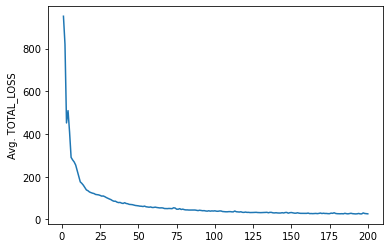

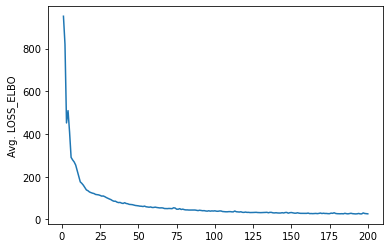

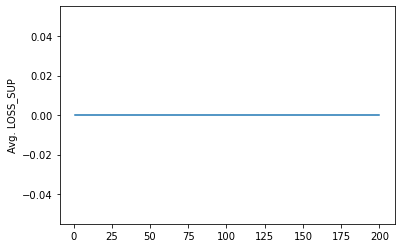

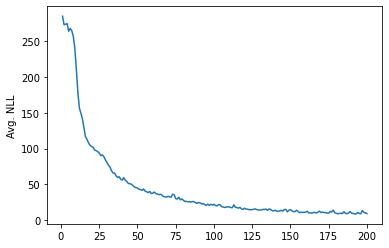

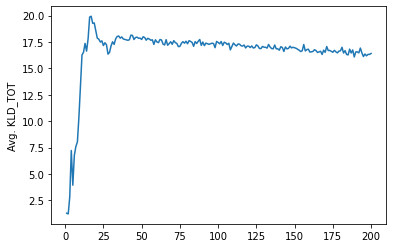

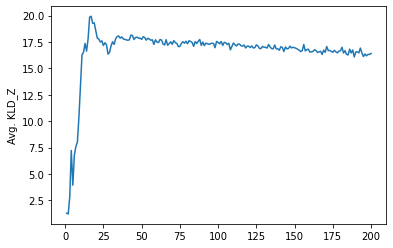

In [27]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

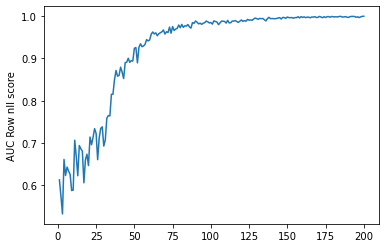

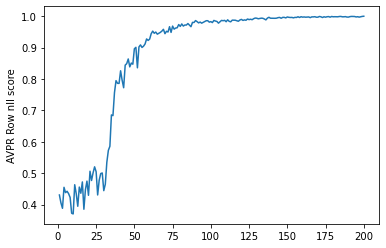

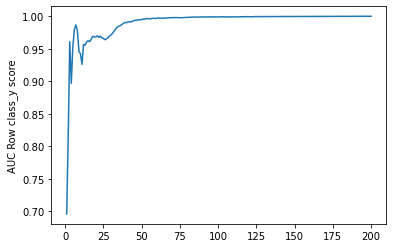

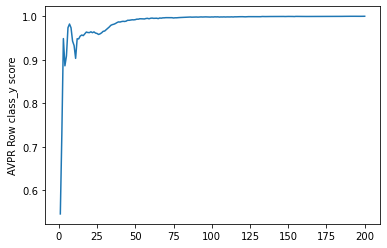

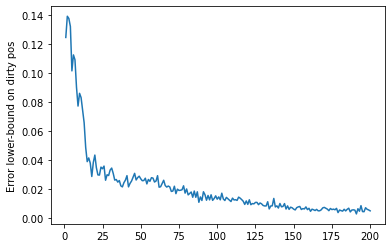

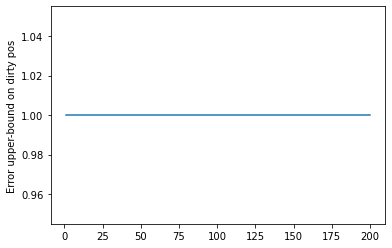

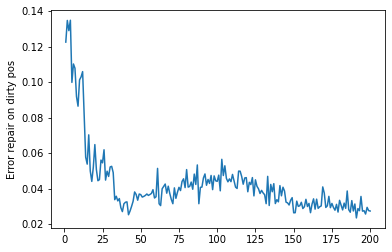

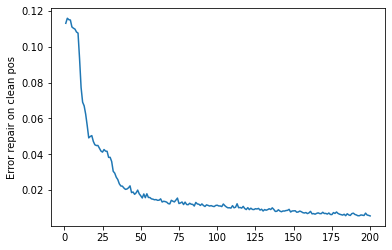

In [28]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

### Plot Validation -- Losses

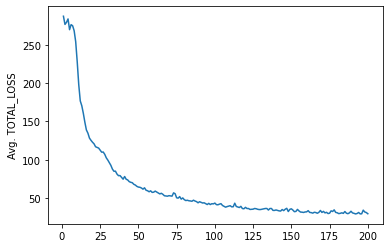

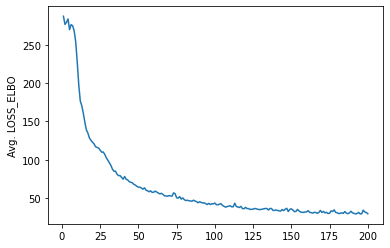

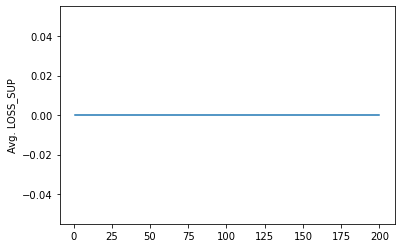

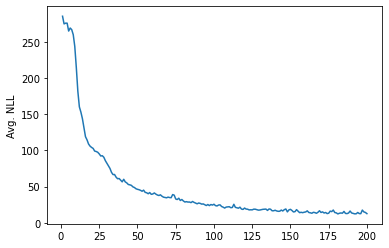

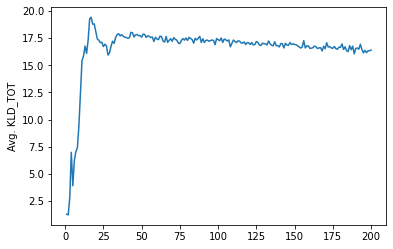

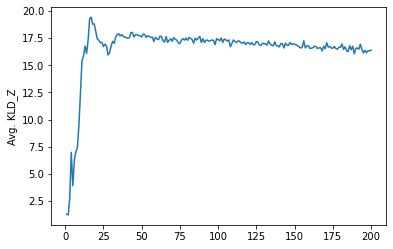

In [29]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

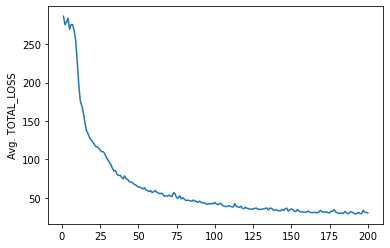

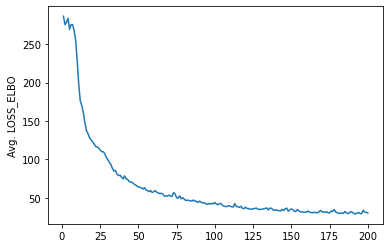

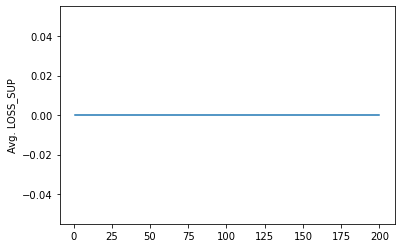

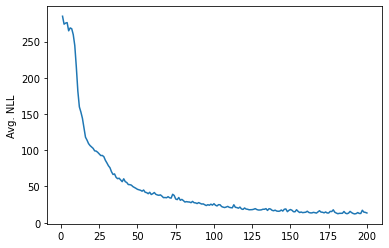

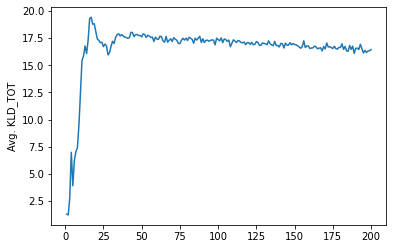

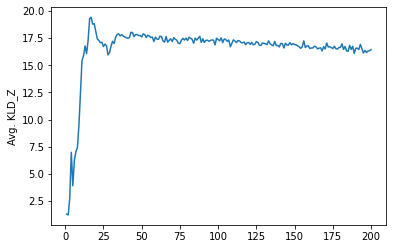

In [30]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [31]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [32]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [4.3679700e+00 9.9270666e-01 9.9146849e-01 9.8335475e-01 9.7995150e-01
 1.5515703e-03 1.9015605e-02 1.0135710e+00 1.0001251e+00 9.7808266e-01
 5.6429808e-03 9.7255671e-01 1.0379066e+00 9.9153525e-01 1.6311182e-03
 2.3416253e-03] 

median of variances (per dim), dirty: 
 [0.79009074 0.99270666 0.9914685  0.98335475 0.9799515  0.00155157
 0.0190156  1.013571   1.000125   0.97808266 0.00564298 0.9725567
 1.0379066  0.99153525 0.00163112 0.00234163] 

median of means (per dim), clean: 
 [ 3.7890859e+00  1.8783942e-02  1.2854333e-03 -2.6051737e-03
 -1.2428880e-02 -1.2761140e-01  7.0234187e-02  1.6013347e-02
  1.5362427e-02  1.9235276e-02 -1.0046966e-01  3.9709806e-03
 -7.6048821e-03 -2.5853319e-02  8.5345984e-02 -2.9066630e-02] 

median of means (per dim), dirty: 
 [ 3.1431801e+00  1.8783942e-02  1.2854333e-03 -2.6051737e-03
 -1.2428880e-02 -1.2761140e-01  7.0234187e-02  1.6013347e-02
  1.5362427e-02  1.9235276e-02 -1.0046966e-01  3.9709806e-03
 -7.60

### Recons

In [33]:
recon_imgs_train = recons_train.reshape(-1,28,28)

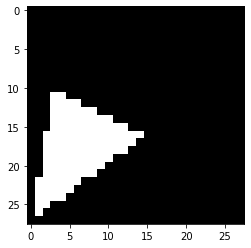

In [34]:
# Show image from train dataset

plt.imshow(x_train_orig[546], cmap="gray",)

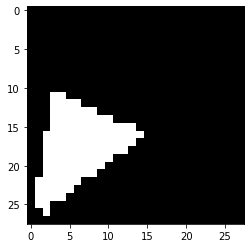

In [35]:
# Show image reconstruction from VAE model

plt.imshow(np.around(recon_imgs_train[546]), cmap="gray", )

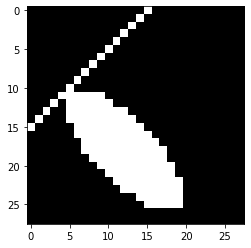

In [36]:
# Show image from train dataset

plt.imshow(x_train_orig[540], cmap="gray",)

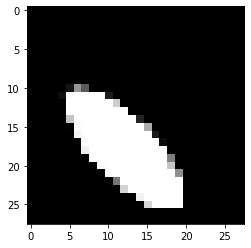

In [37]:
# Show image reconstruction from VAE model

plt.imshow(recon_imgs_train[540], cmap="gray",)

### Show Clean Datapoints at Random

y_noise: 0


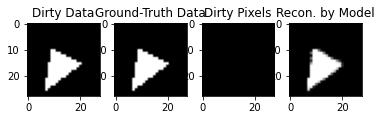

y_noise: 0


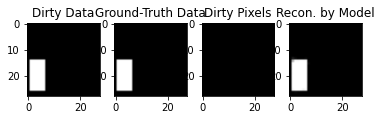

y_noise: 0


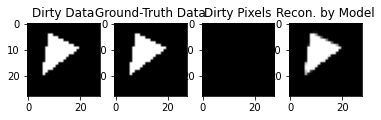

y_noise: 0


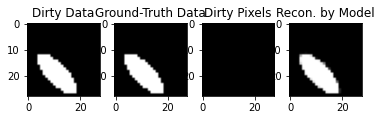

y_noise: 0


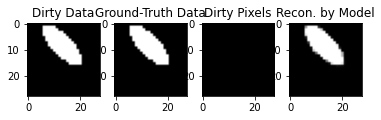

y_noise: 0


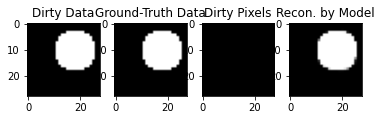

y_noise: 0


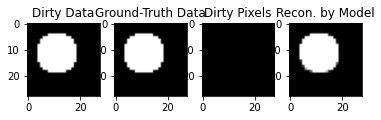

y_noise: 0


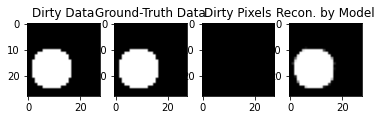

y_noise: 0


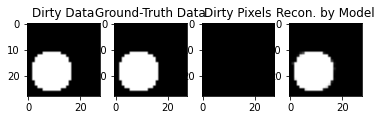

y_noise: 0


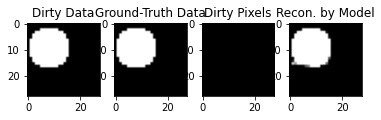

y_noise: 0


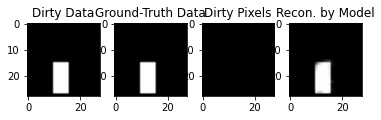

y_noise: 0


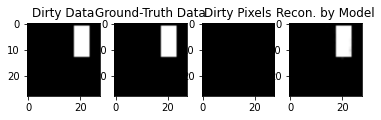

y_noise: 0


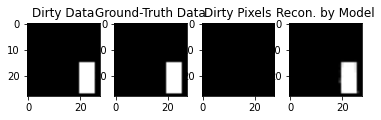

y_noise: 0


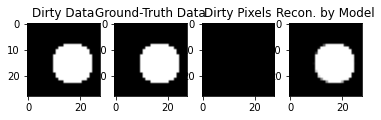

y_noise: 0


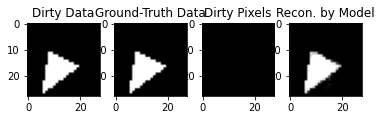

y_noise: 0


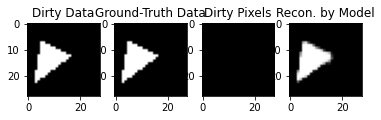

y_noise: 0


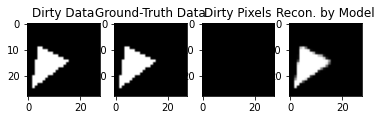

y_noise: 0


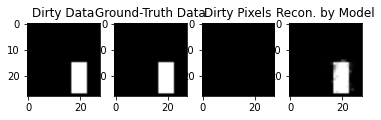

y_noise: 0


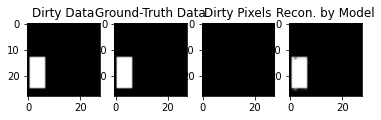

y_noise: 0


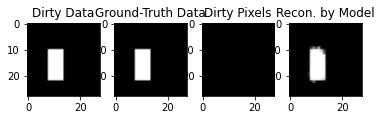

y_noise: 0


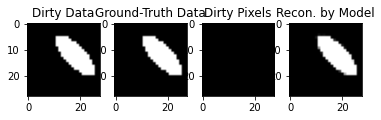

y_noise: 0


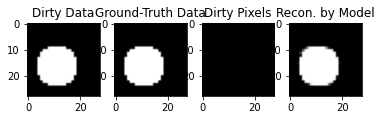

y_noise: 0


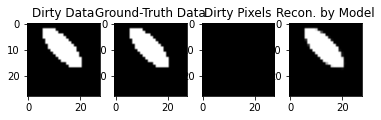

y_noise: 0


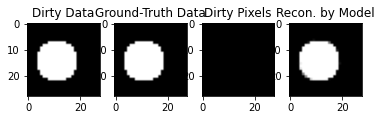

y_noise: 0


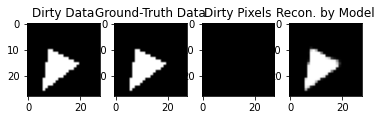

In [38]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Dirty Datapoints at Random

y_noise: 1


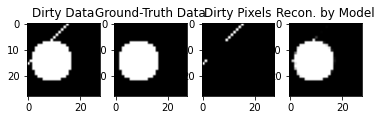

y_noise: 1


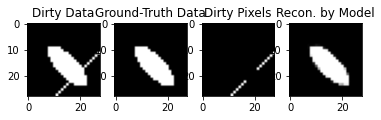

y_noise: 1


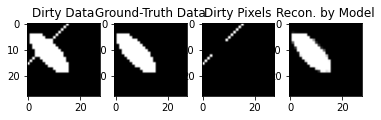

y_noise: 1


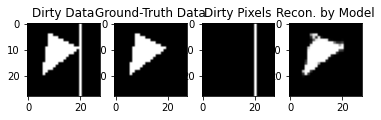

y_noise: 1


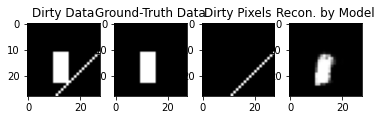

y_noise: 1


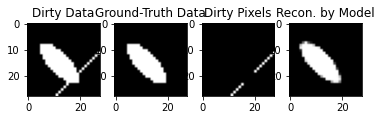

y_noise: 1


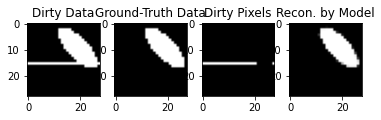

y_noise: 1


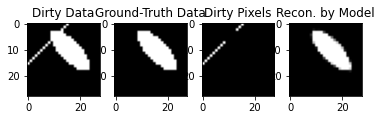

y_noise: 1


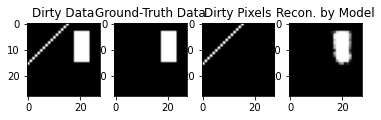

y_noise: 1


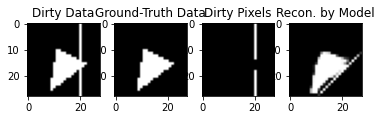

y_noise: 1


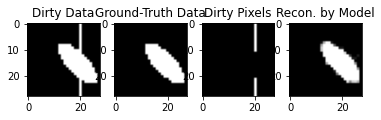

y_noise: 1


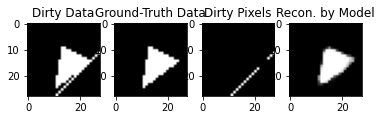

y_noise: 1


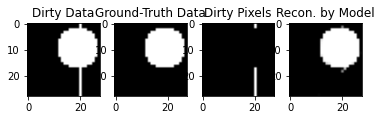

y_noise: 1


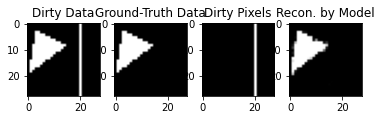

y_noise: 1


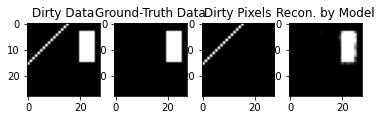

y_noise: 1


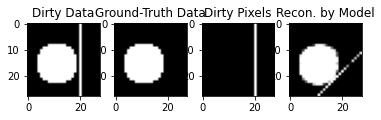

y_noise: 1


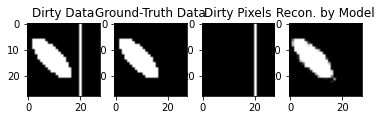

y_noise: 1


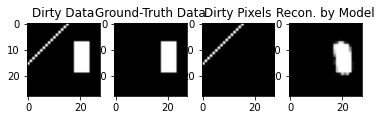

y_noise: 1


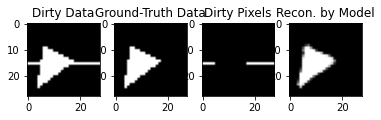

y_noise: 1


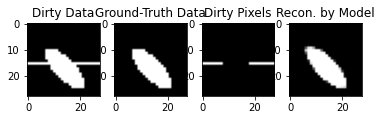

y_noise: 1


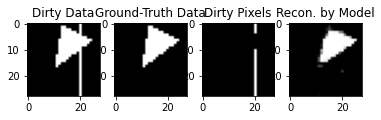

y_noise: 1


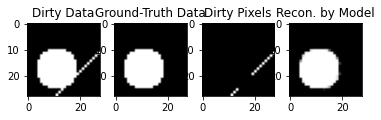

y_noise: 1


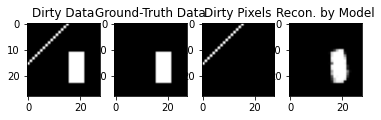

y_noise: 1


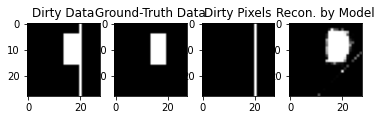

y_noise: 1


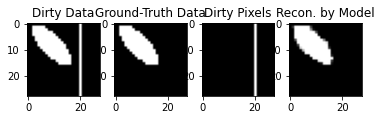

In [39]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict


Noise Tag: 0
Noise Indices: 
[1074, 2486, 847, 3208, 1286, 1959, 3241, 585, 2609, 223, 1834, 3804, 1618, 3708, 163, 1282, 569, 3417, 2556, 3003, 2868, 3866, 171, 2444, 3327, 3933, 3380, 496, 3591, 1448, 2391, 3229, 3073, 602, 2485, 3833, 3766, 3415, 2189, 1189, 2613, 774, 1218, 2408, 1429, 3566, 2383, 2219, 1782, 1810, 769, 977, 3869, 436, 1907, 1110, 2354, 2791, 175, 1970, 717, 427, 755, 47, 1625, 2283, 3928, 472, 725, 2826, 443, 1470, 1307, 3691, 2013, 1938, 198, 3576, 3279, 2578, 3340, 1542, 703, 1956, 1745, 694, 2946, 1871, 1386, 3194, 1626, 2418, 2123, 2345, 2461, 927, 2366, 1924, 2014, 3196, 2061, 3794, 3474, 2340, 2016, 1923, 1571, 3632, 1979, 1040, 425, 3800, 3040, 3526, 1574, 2691, 621, 3549, 946, 3002, 1479, 1531, 3999, 2441, 3106, 1853, 517, 3359, 1936, 1182, 3363, 3376, 971, 405, 916, 2508, 1930, 2322, 1785, 508, 779, 914, 1195, 3533, 1647, 1301, 1905, 1926, 1294, 2639, 2160, 2173, 2943, 3382, 1848, 85, 2832, 2930, 481, 1248, 3521, 3925, 2845, 534, 2246, 1947, 700, 3967, 62

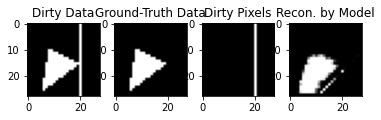

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


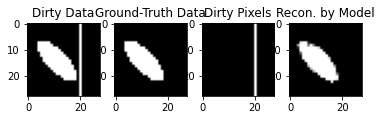

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


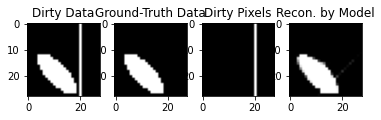

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


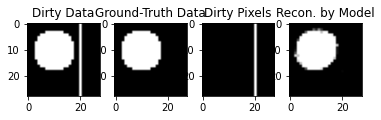

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


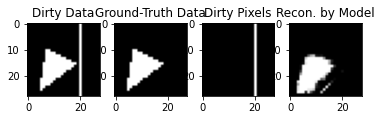

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


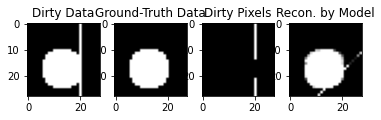

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


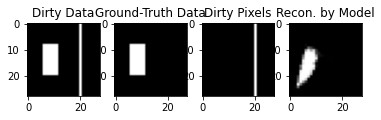

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


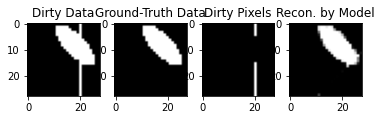

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


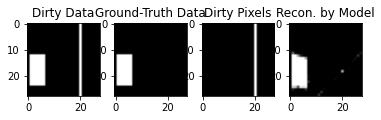

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


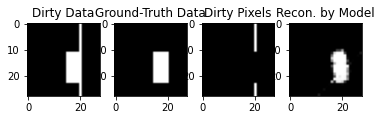







Noise Tag: 1
Noise Indices: 
[2494, 286, 3400, 1695, 3448, 1621, 2518, 3569, 3689, 3683, 1021, 1363, 651, 3134, 611, 2024, 2879, 3515, 2124, 3216, 1760, 1602, 57, 2310, 1895, 529, 2480, 3367, 3758, 561, 2178, 588, 265, 2218, 75, 1513, 1692, 329, 2666, 1250, 734, 2303, 104, 3776, 1567, 1710, 2858, 304, 1787, 3729, 2042, 3393, 345, 962, 642, 2103, 2190, 1224, 2114, 3613, 2595, 2196, 154, 3508, 3711, 2415, 938, 3421, 3, 2665, 2802, 2281, 1018, 3432, 2798, 1126, 1374, 704, 1774, 3817, 2547, 3529, 3978, 3029, 13, 1358, 632, 3910, 817, 376, 1744, 3170, 1950, 1004, 1058, 1207, 1191, 3436, 457, 2818, 650, 3809, 215, 2394, 723, 1026, 229, 2733, 2, 3771, 3233, 285, 1245, 365, 1098, 3390, 702, 2596, 3045, 3242, 2456, 1931, 1029, 320, 3466, 3405, 2829, 996, 283, 3410, 3901, 763, 1138, 237, 3088, 3617, 3681, 3065, 1801, 2874, 2900, 2931, 587, 2305, 1468, 339, 3567, 1263, 2191, 550, 2502, 3594, 66, 3025, 1707, 3899, 2187, 1533, 3462, 2070, 296, 1990, 3525, 2323, 1315, 374, 3947, 3547, 3627, 20

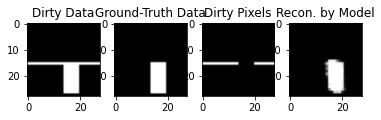

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


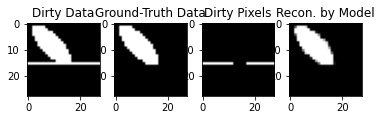

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


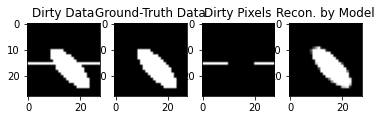

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


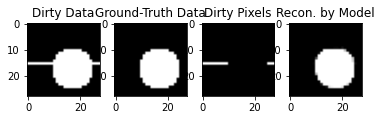

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


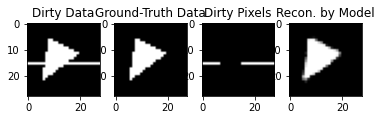

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


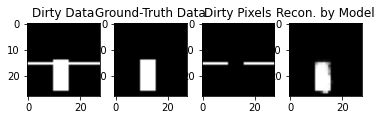

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


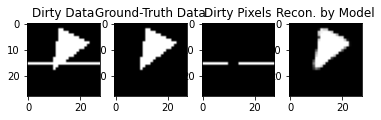

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


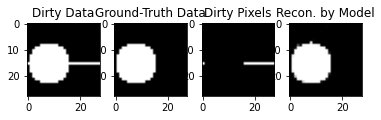

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


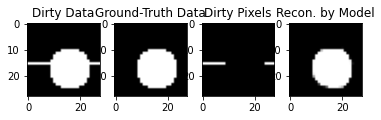

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


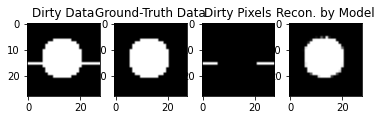







Noise Tag: 2
Noise Indices: 
[3287, 2577, 3902, 2709, 280, 640, 3014, 574, 248, 1090, 2158, 2164, 3353, 521, 24, 1549, 1412, 3243, 3222, 2021, 760, 2893, 854, 3676, 1822, 2567, 2777, 444, 2155, 3322, 1199, 2736, 212, 605, 2458, 1382, 1767, 3994, 1023, 735, 3074, 1627, 3541, 3789, 3907, 3477, 108, 731, 988, 253, 219, 3488, 1739, 488, 3153, 3274, 3812, 2847, 3517, 3111, 736, 3922, 3888, 838, 3148, 21, 382, 1401, 469, 1354, 3494, 1406, 199, 3101, 1749, 2237, 861, 244, 416, 3923, 1230, 751, 568, 3524, 732, 535, 1597, 3163, 3486, 2541, 2121, 1394, 3184, 1033, 370, 1439, 3532, 625, 3375, 3048, 786, 1463, 1994, 2232, 1091, 101, 1454, 3309, 1206, 1863, 3112, 2935, 886, 1444, 3643, 3404, 1279, 2972, 315, 148, 672, 1087, 1024, 3237, 1234, 1216, 1672, 3824, 1162, 1208, 3527, 1657, 1667, 2068, 3203, 2448, 3915, 318, 656, 943, 307, 1329, 1212, 3951, 391, 194, 816, 3411, 679, 1326, 526, 3602, 2241, 3094, 3064, 581, 1285, 281, 2591, 2606, 3461, 1591, 863, 3136, 3253, 3133, 274, 1311, 1519, 3036

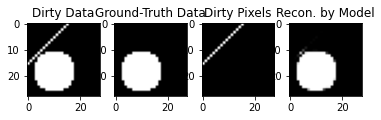

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


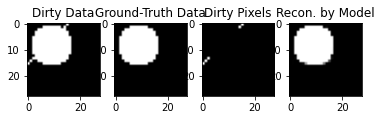

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


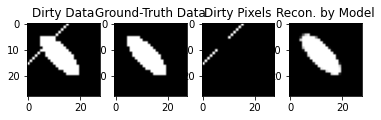

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


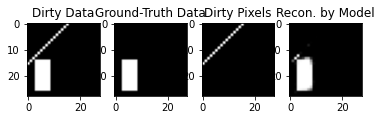

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


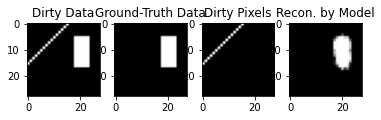

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


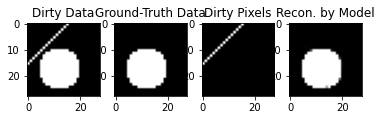

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


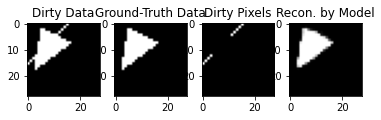

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


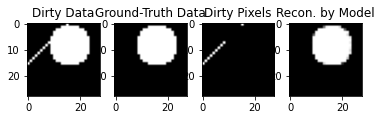

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


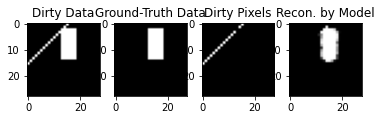

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


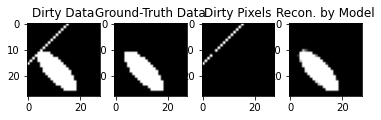







Noise Tag: 3
Noise Indices: 
[893, 202, 42, 2702, 1243, 3548, 3316, 3100, 2558, 2181, 3126, 1974, 1932, 3395, 1875, 2688, 394, 1253, 3490, 1001, 532, 3302, 3830, 684, 3697, 726, 693, 1844, 815, 1849, 870, 234, 1009, 3299, 937, 966, 1438, 2206, 1507, 2682, 1537, 2051, 1901, 2966, 1421, 3337, 3219, 3742, 1178, 2392, 810, 589, 297, 900, 2250, 2864, 1164, 3444, 3396, 2627, 2805, 2449, 2778, 3619, 2171, 3028, 873, 2548, 3572, 2797, 2538, 2435, 1289, 3024, 1802, 1645, 3612, 2212, 3763, 3956, 969, 1462, 3858, 2017, 485, 3780, 420, 3540, 3082, 951, 3853, 2721, 1046, 2511, 118, 1449, 476, 3714, 3563, 2951, 1933, 3458, 2906, 3429, 2108, 3171, 266, 68, 1214, 259, 1435, 3737, 2555, 2174, 216, 3864, 37, 3701, 1048, 317, 3657, 2497, 2285, 813, 81, 76, 3670, 842, 818, 359, 869, 565, 3652, 3290, 401, 2455, 980, 2539, 2959, 1966, 756, 1656, 609, 1176, 2221, 1028, 1980, 2139, 2960, 3531, 182, 3738, 784, 3188, 399, 2244, 2697, 245, 269, 2938, 2597, 428, 1318, 1577, 408, 1754, 1314, 1005, 3813, 3554

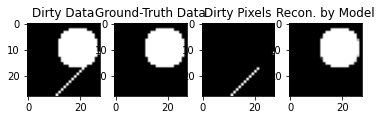

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


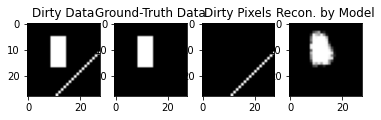

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


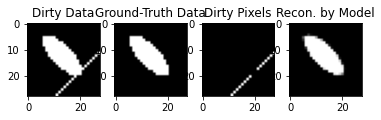

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


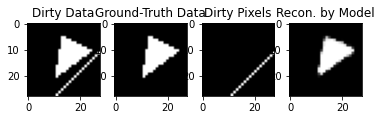

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


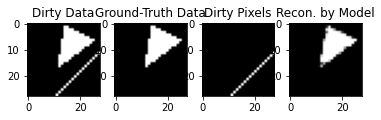

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


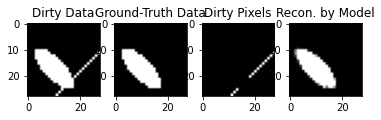

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


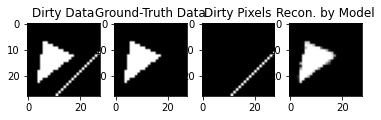

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


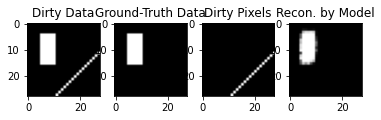

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


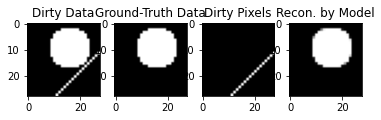

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


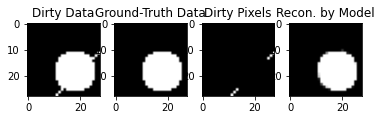

In [40]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")



### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [41]:
len(trusted_idxs_train)

80

y_noise: 0


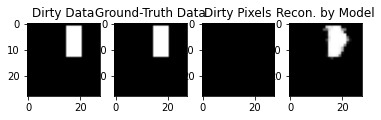

y_noise: 0


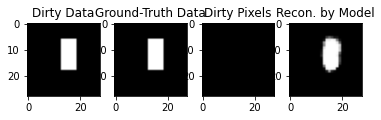

y_noise: 0


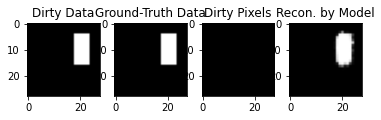

y_noise: 0


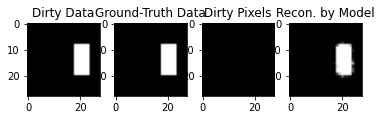

y_noise: 0


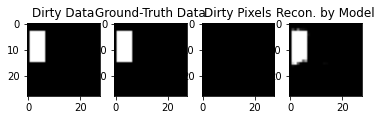

y_noise: 0


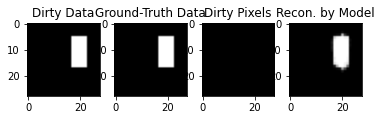

y_noise: 0


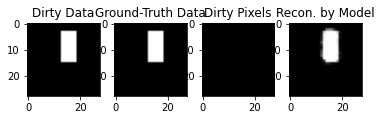

y_noise: 0


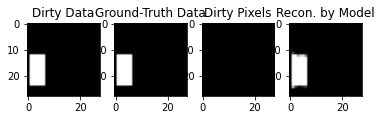

y_noise: 0


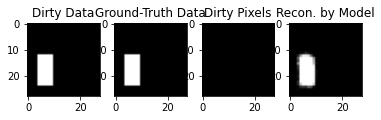

y_noise: 0


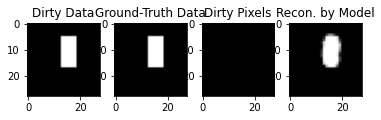

y_noise: 0


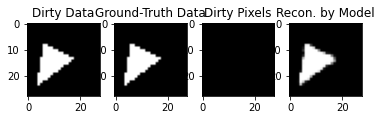

y_noise: 0


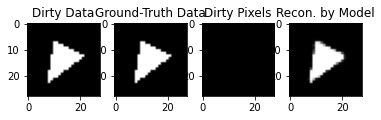

y_noise: 0


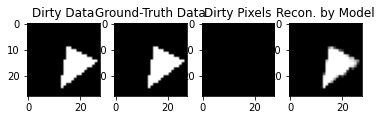

y_noise: 0


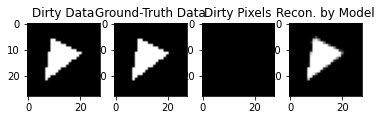

y_noise: 0


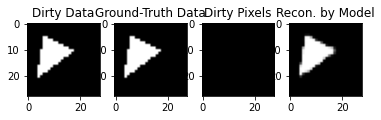

y_noise: 0


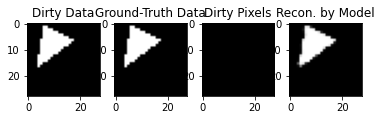

y_noise: 0


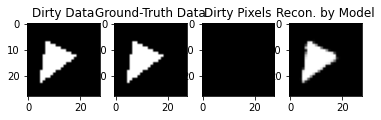

y_noise: 0


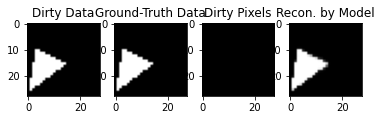

y_noise: 0


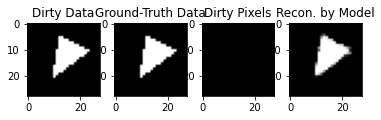

y_noise: 0


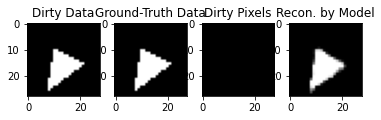

y_noise: 0


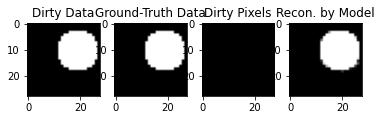

y_noise: 0


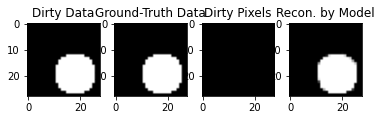

y_noise: 0


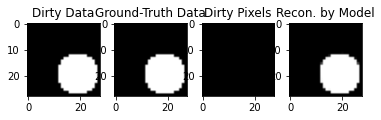

y_noise: 0


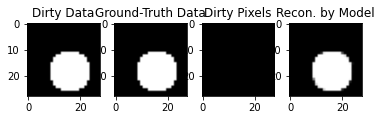

y_noise: 0


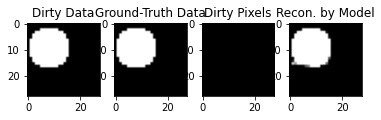

y_noise: 0


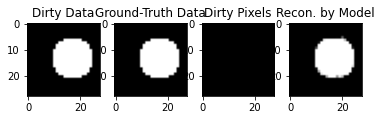

y_noise: 0


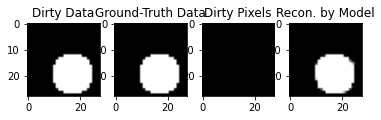

y_noise: 0


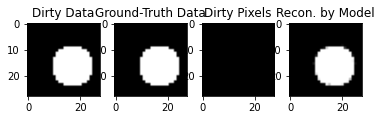

y_noise: 0


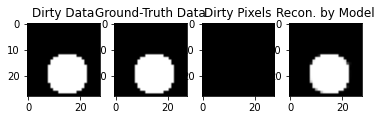

y_noise: 0


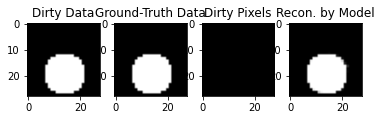

y_noise: 0


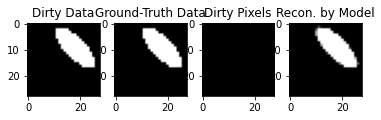

y_noise: 0


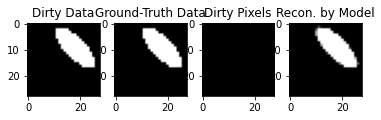

y_noise: 0


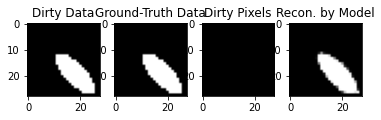

y_noise: 0


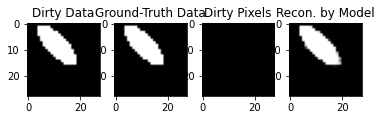

y_noise: 0


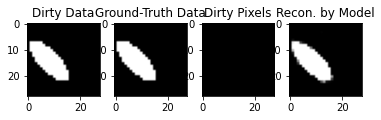

y_noise: 0


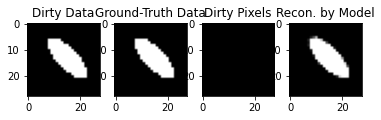

y_noise: 0


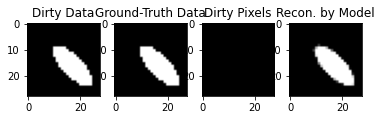

y_noise: 0


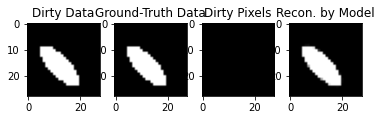

y_noise: 0


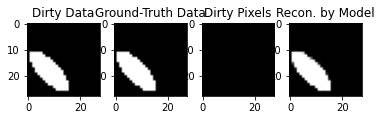

y_noise: 0


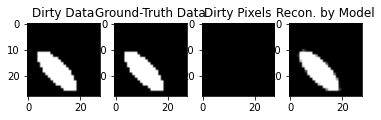

y_noise: 1


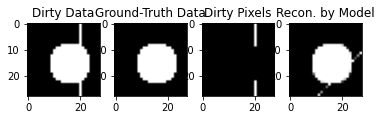

y_noise: 1


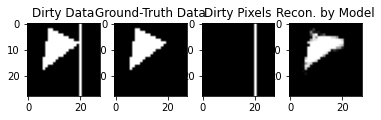

y_noise: 1


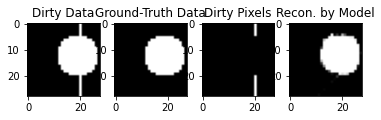

y_noise: 1


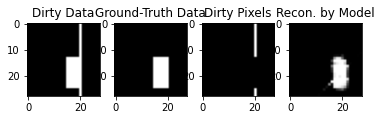

y_noise: 1


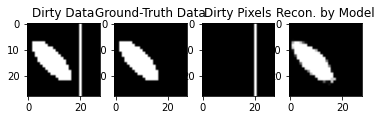

y_noise: 1


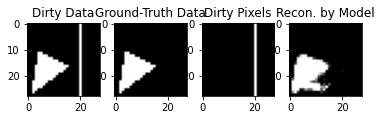

y_noise: 1


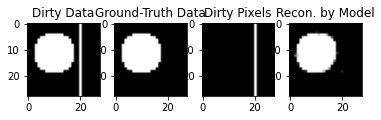

y_noise: 1


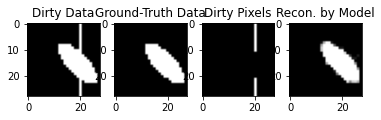

y_noise: 1


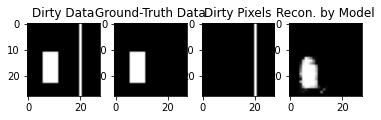

y_noise: 1


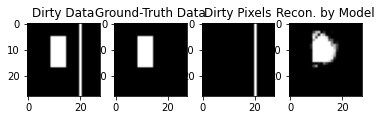

y_noise: 1


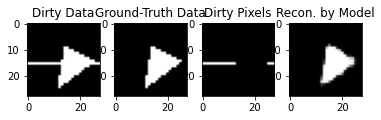

y_noise: 1


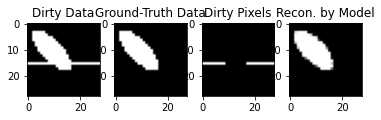

y_noise: 1


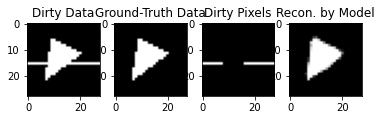

y_noise: 1


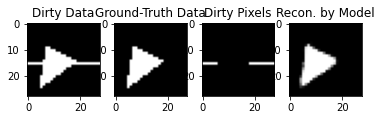

y_noise: 1


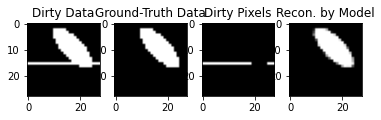

y_noise: 1


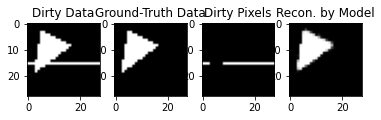

y_noise: 1


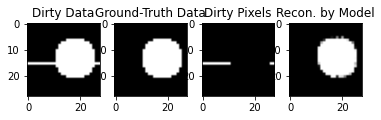

y_noise: 1


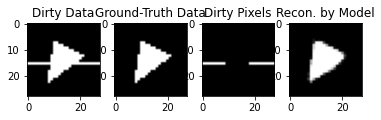

y_noise: 1


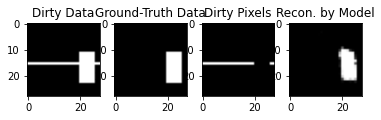

y_noise: 1


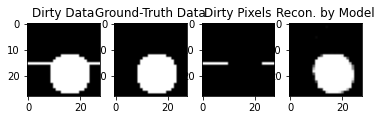

y_noise: 1


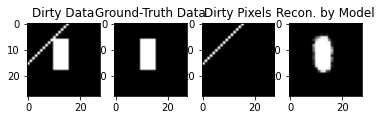

y_noise: 1


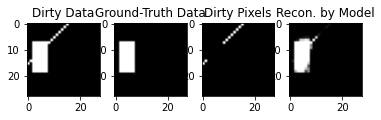

y_noise: 1


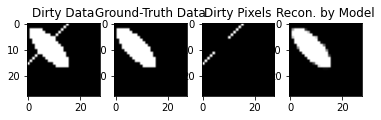

y_noise: 1


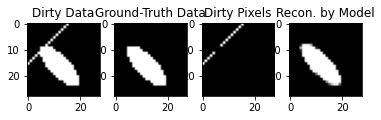

y_noise: 1


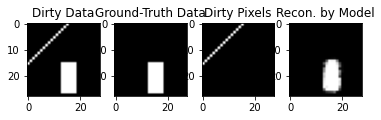

y_noise: 1


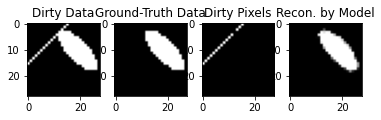

y_noise: 1


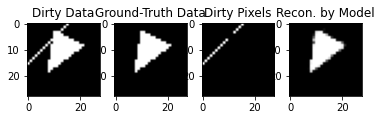

y_noise: 1


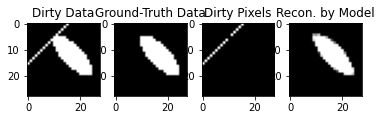

y_noise: 1


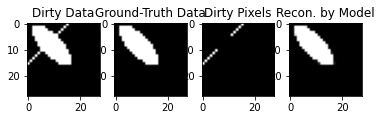

y_noise: 1


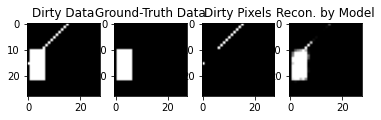

y_noise: 1


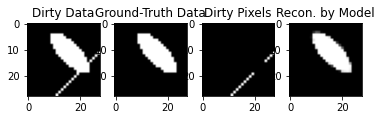

y_noise: 1


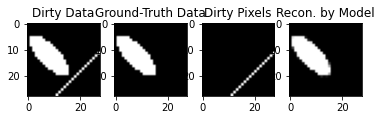

y_noise: 1


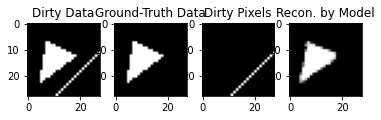

y_noise: 1


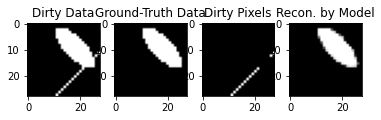

y_noise: 1


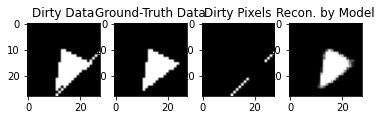

y_noise: 1


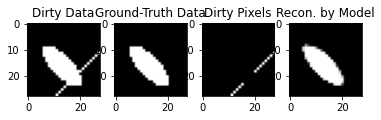

y_noise: 1


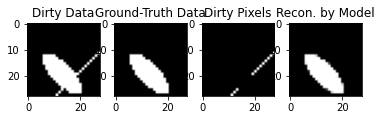

y_noise: 1


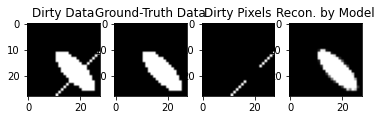

y_noise: 1


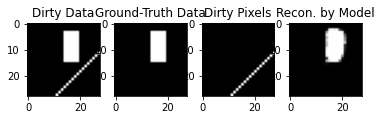

y_noise: 1


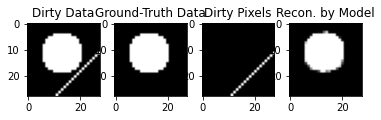

In [42]:
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Approx. Log-Likelihood

In [43]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [44]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [45]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 32/32 [00:01<00:00, 24.34it/s]


In [46]:
# print(prof)

In [47]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [48]:
df_elbo_iwae

,log_px_y1,log_px_y0,noise_label
0,-20.435642,-23.501701,clean
1,-19.439089,-22.667917,clean
2,-44.404449,-25.310104,dirty
3,-28.072361,-20.774057,dirty
4,-26.493797,-29.783506,clean
...,...,...,...
3995,-23.532602,-24.595798,clean
3996,-21.453846,-24.296402,clean
3997,-14.833916,-16.614269,clean
3998,-21.679031,-26.011421,clean


In [49]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

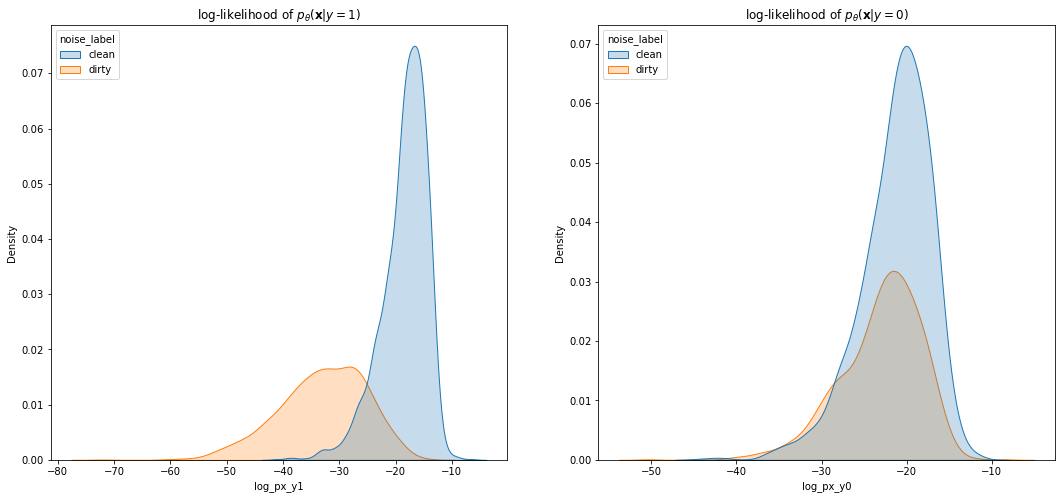

In [50]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)
#_ax = axes[0].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=False, fill=False, stat="density")

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)
#_ax = axes[1].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=False, fill=False, stat="density")

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


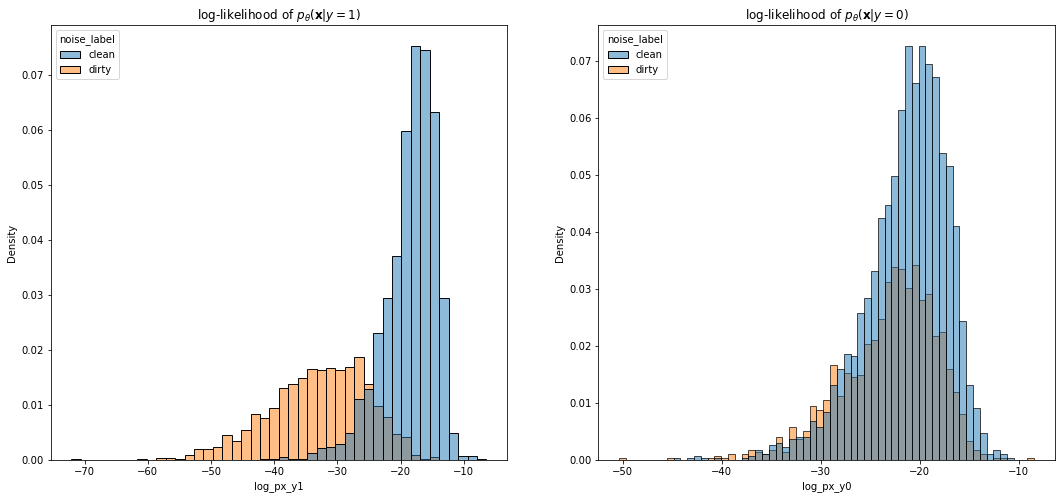

In [51]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [52]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins



In [53]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [54]:
np.sum(np.abs(top_model - top_data))

0.5947096767582866

In [55]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [56]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.21842546359047474